In this notebook, I will be exploring the importance of communication skills in the recruitment of a Software developer. 

First, we import all the required libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import Utils as u
%matplotlib inline

# Data gathering
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# df['Methodology'].unique()
df = df[(df['WebDeveloperType'] == 'Full stack Web developer') | 
       (df['WebDeveloperType'] == 'Back-end Web developer')   | 
       (df['WebDeveloperType'] == 'Front-end Web developer')]

Looking at the Methodology column we can see that the values are not so unique and this is an issue. We need to utilize the total_count function in the Utils.py file to get an accurate count of each methodology.  

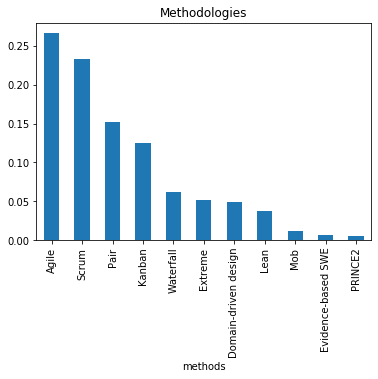

,count
method,
Agile,0.266510
Scrum,0.232773
Pair,0.152143
Kanban,0.125440
Waterfall,0.061482
Extreme,0.051973
Domain-driven design,0.048587
Lean,0.037775
Mob,0.011202


In [66]:
method_vals = u.get_unique(df['Methodology'])
methodology = u.clean_and_plot(df, method_vals, 'Methodology', 'methods', title='Methodologies')
methodology

Next, we look in the version control column

In [72]:
df['VersionControl'].unique()

array(['Git', nan, 'Team Foundation Server', 'I use some other system',
       'Subversion', 'Mercurial', "I don't use version control",
       'Copying and pasting files to network shares', 'Zip file back-ups',
       'Visual Source Safe', 'Rational ClearCase'], dtype=object)

On the other hand, the values in the VersionControl column are distinctive. This means that we can directly get the bar chart.

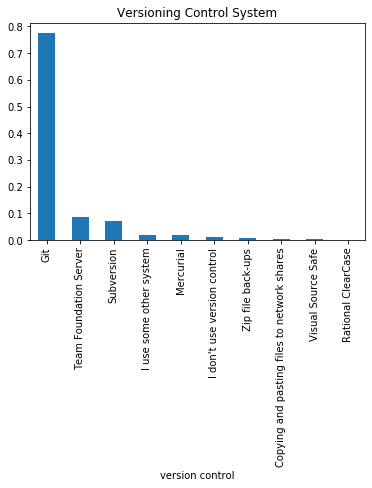

,count
method,
Git,0.775066
Team Foundation Server,0.088246
Subversion,0.072850
I use some other system,0.019151
Mercurial,0.017649
I don't use version control,0.011265
Zip file back-ups,0.007510
Copying and pasting files to network shares,0.004882
Visual Source Safe,0.003004


In [67]:
versioning = u.get_unique(df['VersionControl'])
method = u.clean_and_plot(df, versioning, 'VersionControl', 'version control', title='Versioning Control System')
method

In [61]:
df['CompanySize'].unique()

array(['Fewer than 10 employees', '100 to 499 employees', nan,
       '10,000 or more employees', '20 to 99 employees',
       '1,000 to 4,999 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '10 to 19 employees', "I don't know",
       'I prefer not to answer'], dtype=object)

After seein the bar plots above, I wondered what methodology and versioning control system is highly used by companies with 1,000 employess and above. The customized bar chart displays the results below. 

First, we see the plot for the methodologies being adopted by large companies.

In [62]:
# Consider companies of 5,000 employess and above
# df['LargeCompanies'] = df['FormalEducation'].apply(lambda x: 1 if x in ("Master's degree", 'Professional degree') else 0)
# df['LargeCompanies'].mean()

df['LargeCompanies'] = df['CompanySize'].apply(lambda x: 1 if x in ('10,000 or more employees', '5,000 to 9,999 employees') else 0)
df['LargeCompanies'].mean()

0.12295846943537098

In [63]:
tc_1 = df[df['LargeCompanies'] == 1]
tc_0 = df[df['LargeCompanies'] == 0]

In [68]:
# tc_1_perc = u.clean_and_plot2(tc_1, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Large Companies', plot=False)
# tc_0_perc = u.clean_and_plot2(tc_0, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Max of Small Companies', plot=False)

tc_1_perc = u.clean_and_plot(tc_1, u.get_unique(df['Methodology']), 'Methodology', 'Methodology', plot=False)
tc_0_perc = u.clean_and_plot(tc_0, u.get_unique(df['Methodology']), 'Methodology', 'Methodology', plot=False)

tc_comp_df = pd.merge(tc_1_perc, tc_0_perc, left_index=True, right_index=True)
tc_comp_df.columns = ["tc_1_perc(> 5,000 employees)", "tc_0_perc(< 5,000 employees)"]
tc_comp_df['DiffLargeCompaniesVals'] = tc_comp_df["tc_1_perc(> 5,000 employees)"] - tc_comp_df["tc_0_perc(< 5,000 employees)"]
tc_comp_df.style.bar(subset=['DiffLargeCompaniesVals'], align='mid', color=['#d65f5f', '#5fba7d'])
# print(tc_1_perc)

,"tc_1_perc(> 5,000 employees)","tc_0_perc(< 5,000 employees)",DiffLargeCompaniesVals
method,,,
Agile,0.282678,0.264252,0.018426
Scrum,0.245484,0.230998,0.014486
Pair,0.150903,0.152316,-0.001413
Kanban,0.106270,0.128118,-0.021848
Waterfall,0.072264,0.059976,0.012287
Extreme,0.048884,0.052405,-0.003521
Domain-driven design,0.041445,0.049584,-0.008139
Lean,0.027630,0.039192,-0.011562
Mob,0.011690,0.011134,0.000555


We follow the same method to produce a chart for version control system.

In [28]:
# df['Professional'].unique()

In [69]:
# tc_1_perc = u.clean_and_plot2(tc_1, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Large Companies', plot=False)
# tc_0_perc = u.clean_and_plot2(tc_0, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Max of Small Companies', plot=False)

tp_1_perc = u.clean_and_plot(tc_1, u.get_unique(df['VersionControl']), 'VersionControl', 'VersionControl', plot=False)
tp_0_perc = u.clean_and_plot(tc_0, u.get_unique(df['VersionControl']), 'VersionControl', 'VersionControl', plot=False)

tp_comp_df = pd.merge(tp_1_perc, tp_0_perc, left_index=True, right_index=True)
tp_comp_df.columns = ["tc_1_perc(> 5,000 employees)", "tc_0_perc(< 5,000 employees)"]
tp_comp_df['DiffLargeCompaniesVals'] = tp_comp_df["tc_1_perc(> 5,000 employees)"] - tp_comp_df["tc_0_perc(< 5,000 employees)"]
tp_comp_df.style.bar(subset=['DiffLargeCompaniesVals'], align='mid', color=['#d65f5f', '#5fba7d'])
# print(tc_1_perc)

,"tc_1_perc(> 5,000 employees)","tc_0_perc(< 5,000 employees)",DiffLargeCompaniesVals
method,,,
Git,0.620061,0.796915,-0.176854
Team Foundation Server,0.148936,0.079692,0.069245
Subversion,0.124620,0.065553,0.059067
I use some other system,0.051672,0.014567,0.037104
Mercurial,0.033435,0.015424,0.018010
I don't use version control,0.009119,0.011568,-0.002450
Zip file back-ups,0.006079,0.007712,-0.001633
Copying and pasting files to network shares,0.003040,0.005141,-0.002102
Visual Source Safe,0.003040,0.002999,0.000040


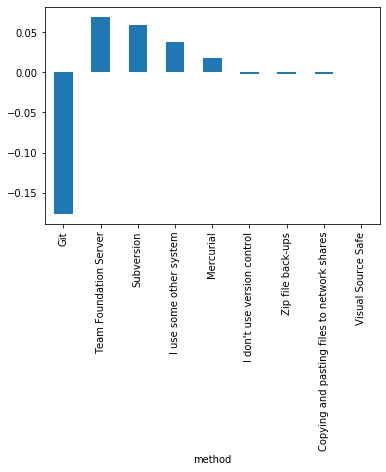

In [73]:
# Visualize DiffLargeCompaniesVals in a bar plot
(tp_comp_df['DiffLargeCompaniesVals']).plot(kind="bar");